In [17]:
import numpy as np
from PIL import Image
from PIL import ImageSequence
#Download necessary image files
#Read in train image files
tif_file = "Raw_Data/training.tif"
name_string = 'training_inputs'

def Tif_Stack_To_Array(tif_file,name_string):
    stack = Image.open(tif_file)

    width, height = stack.size
    slices = 0
    for frame in ImageSequence.Iterator(training_stack):
        slices += 1
    
    print('File Format:', stack.format,'\nSize:',width,'x',height,'x',slices)

    #Create numpy array of length N training examples, C, channels, widtch W, and height H
    array_out = np.empty((slices,1,height,width))

    for i,frame in enumerate(ImageSequence.Iterator(stack)):
        array_out[i,:,:,:] = np.array(frame)
    
    np.save(name_string, array_out)
    
    return array_out
    
training_inputs = Tif_Stack_To_Array(tif_file, name_string)

File Format: TIFF 
Size: 1024 x 768 x 165


In [18]:
#Do the same for the other data files
training_ground_truth = Tif_Stack_To_Array("Raw_Data/training_groundtruth.tif",
                                           'training_ground_truth')

training_ground_truth = Tif_Stack_To_Array("Raw_Data/testing.tif",
                                           'testing_inputs')

tseting_ground_truth = Tif_Stack_To_Array("Raw_Data/testing_groundtruth.tif",
                                           'testing_ground_truth')

File Format: TIFF 
Size: 1024 x 768 x 165
File Format: TIFF 
Size: 1024 x 768 x 165
File Format: TIFF 
Size: 1024 x 768 x 165


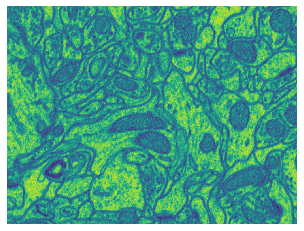

In [36]:
import matplotlib.pyplot as plt
def imshow_no_ax(img, normalize = True):
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 255.0 * (img - img_min)/(img_max - img_min)
    plt.imshow(img.astype('uint8'))
    plt.gca().axis('off')

img = training_input[5,0,:,:]
imshow_no_ax(img)